$
\newcommand{\RR}{\mathbf{R}}
\newcommand{\ZZ}{\mathbf{Z}}
\newcommand{\NN}{\mathbf{N}}
\newcommand{\e}{\mathrm{e}}
\newcommand{\eps}{\varepsilon}
$

# HW 1

- Submitted 2/3/18 by Colton Grainger for Math-428: Numerical Methods, Spring 2018, UIdaho Engineering Outreach.

## Number Systems
### prob 1

Convert to [radix](https://en.wikipedia.org/wiki/Radix) $10$: $(1011011.001)_2$.

In [1]:
# represent (1011011.001)_2 as a "float"
mantissa = [1,0,1,1,0,1,1,0,0,1]
exponent = 7

# initialize decimal rep
c = 0

# add powers of 2 to decimal rep
for i in range(len(mantissa)):
    c = c + mantissa[i]*(2^(-i-1))
    
# shift decimal point
c = c*2^exponent

print(str(c) + " = " + str(n(c)))

729/8 = 91.1250000000000


Convert to radix $2$: $(2018)_{10}$.

In [2]:
# integer to be converted
m = 2018

# find the greatest i s.th. 2**i < m
i = 0
while m > 2**i:
    i = i + 1
i = i - 1

# initialize empty list and counter
c = []
N = 0

# remove powers of 2 from m, create binary rep
while m != 0 and N < 15: # note stopping condition
    if m >= 2**i:
        m = m - 2**i
        c.append(1)
    else:
        c.append(0)
    i += -1
    N += 1
print(str(c)+"_2")

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]_2


### prob 2

The floating point representation of a real number is $x=\pm
(0.d_{1}d_{2}\ldots d_{n})_\beta\cdot \beta^e$, where
$d_{1}\not=0$, $-M\leq e\leq M$. Suppose that $\beta=2$, $n=6$,
$M=5$.

Here's the smallest (positive) number in this floating point system.

In [3]:
# represent (0.100000)_2 * 2^-5 as a "float"
mantissa = [1,0,0,0,0,0]
exponent = -5

# create decimal rep
c = 0
for i in range(len(mantissa)):
    c = c + mantissa[i]*(2^(-i-1))
c = c*2^exponent

print(str(c) + " = " + str(n(c)))

1/64 = 0.0156250000000000


Here's the largest number.

In [4]:
# represent (0.111111)_2 * 2^5 as a "float"
mantissa = [1,1,1,1,1,1]
exponent = 5

# create decimal rep
c = 0
for i in range(len(mantissa)):
    c = c + mantissa[i]*(2^(-i-1))
c = c*2^exponent

print(str(c) + " = " + str(n(c)))

63/2 = 31.5000000000000


### prob 4

In [5]:
def convert_to_binary(n): ## n must be a natural number
    q = [n]
    a = []
    j = 0
    while q[-1] != 0:
        q.append(q[j] // 2)
        a.append(q[j] % 2)
        j = j + 1
    print(str(list(reversed(a)))+'_2')

In [6]:
convert_to_binary(4)

[1, 0, 0]_2


In [7]:
convert_to_binary(56)

[1, 1, 1, 0, 0, 0]_2


In [8]:
convert_to_binary(1543)

[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]_2


## Finite Precision Arithmetic

### prob 3

Near certain values of $x$ each of the following functions
cannot be accurately  computed using the formula as given due to
cancellation error. Identify the values of $x$ which are involved
(e.g. near $x=0$ or large positive $x$) and propose a
reformulation of the function (e.g., using Taylor series,
rationalization, trigonometric identities, etc.) to remedy the
problem.

**Example.** The function $f(x)=1+\cos x$ cannot be computed accurately on the open balls $V_\eps(x)$ with $x \in \{2k\pi+\pi: k \in \ZZ\}$ for small $\eps$. 

For example, given $\eps = 0.5*10^{-7}$ on the open ball $V_\eps(\pi)$ we have

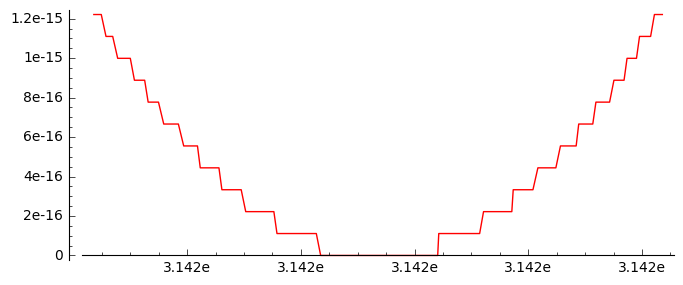

In [9]:
f = 1 + cos(x)
eps = 0.5*10^(-7)
plot(f, (x,pi-eps, pi+eps), color = 'red').show(figsize = [7,3])

We can, however, approximate $f$ about all $x \in \{2k\pi+\pi: k \in \ZZ\}$ with a truncated 2nd order Taylor polynomial. Consider $x$ about $\pi$.

-1/24*(pi - x)^4 + 1/2*(pi - x)^2

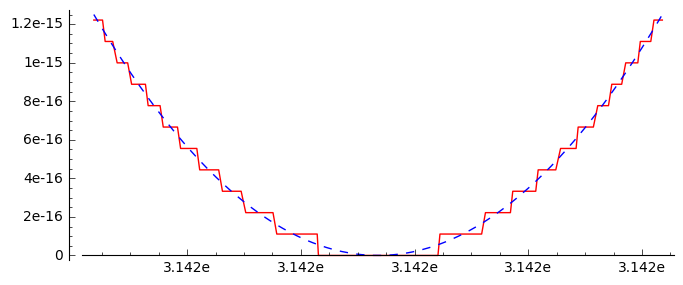

In [10]:
show(f.taylor(x, pi, 4))
A = plot(f, (x,pi-eps, pi+eps), color = 'red')
B = plot(f.taylor(x, pi, 2), (x,pi-eps, pi+eps), linestyle = '--')
show(A+B,figsize = [7,3])

**Example.** Consider $f(x)=\e^{-x}+\sin x-1$.

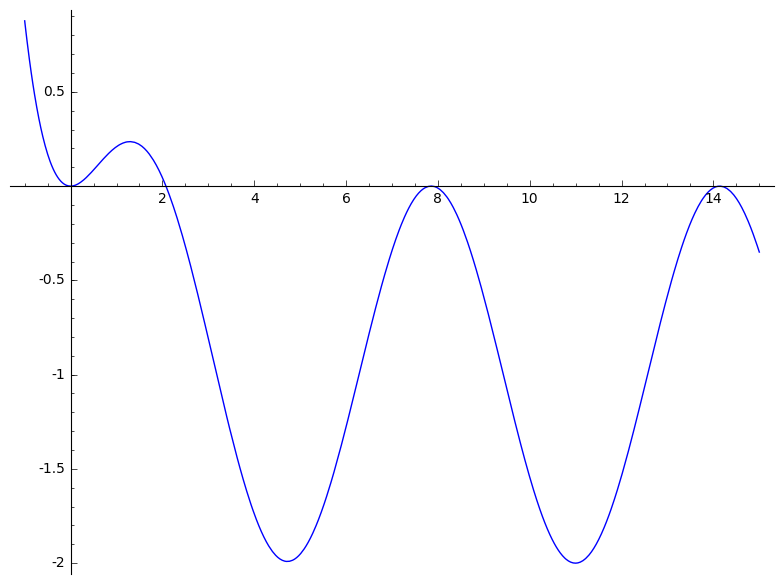

In [11]:
f = e^(-x) + sin(x) - 1
plot(f, (x, -1, 15))

We are looking for roots of multiplicity greater than $1$, as near these roots to compute $f$ we must subtract close numbers. 

Equivalently, we're looking for open balls $V_\eps(x)$ where $f(x) = 0$ and $f'(x) \approx 0$.

- $V_\eps(0)$ is such an open ball. 
- We don't care about the root near $2$, as $|f'(x)|_{x\approx 2}$ is large.
- There are roots near $7.10000000008731$ and $7.85000000006985$, but the slope of $f$ is large enough to prevent significant cancellation of digits. 
- For $x > 10$, the transient term $e^{-x}$ is negligible, and "problematic" open balls are thus $V_\eps(x)$ with $x \in \{2k\pi+\pi/2 : k \in \NN, k > 2\}$.

Aside: On my hardware, what's the least $M$ such that $\e^{-x}+\sin x-1$ computes to a value less than or equal to $0$ for all $x > M$? I feel like I need to know the difference between [machine epsilon](https://en.wikipedia.org/wiki/Machine_epsilon) and the [unit in the last place](https://en.wikipedia.org/wiki/Unit_in_the_last_place).

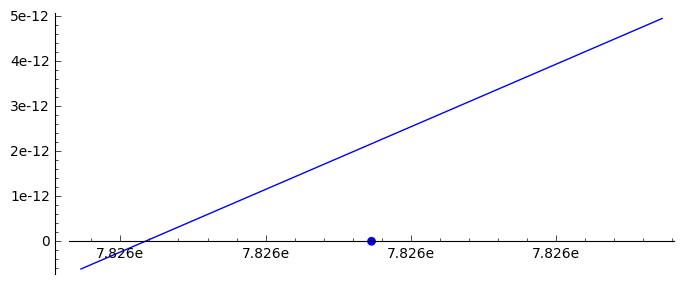

In [12]:
from numpy import sign

# to find roots, we bisect
def bisect(f, a, b, eps, Nmax):
    i=0
    while b - a > eps and i < Nmax:
        p = a + (b-a)/2
        if sign(f(x=p)) == sign(f(x=b)):
            b = p
        else:
            a = p
        i += 1
    return p

# plot "non-problematic" root
a = 7.1
b = 7.85
eps = 10^(-10)
p = bisect(f, a, b, eps, 50)
(point((p,0), size = '40') + plot(f, (x, p - eps, p + eps))).show(figsize=[7,3])

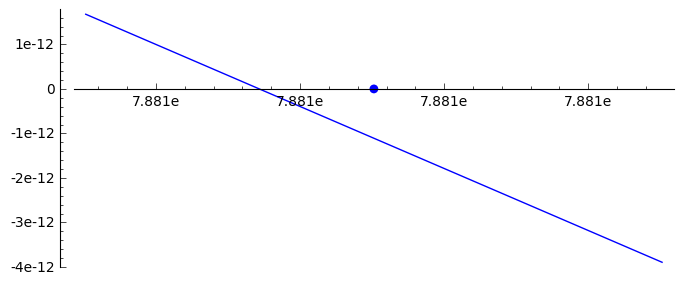

In [13]:
# plot another "non-problematic" root
a = 7.85
b = 8
eps = 10^(-10)
p = bisect(f, a, b, eps, 50)
(point((p,0), size = '40') + plot(f, (x, p - eps, p + eps))).show(figsize=[7,3])

For the remaining open balls $V_\eps(x)$ with $x \in \{2k\pi+\pi/2 : k \in \NN, k > 2\}$, we'll approximate $f$ with a 2nd order Taylor polynomial (dashed).

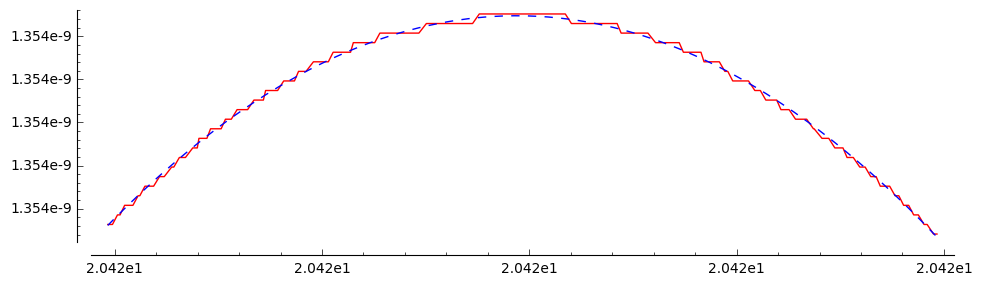

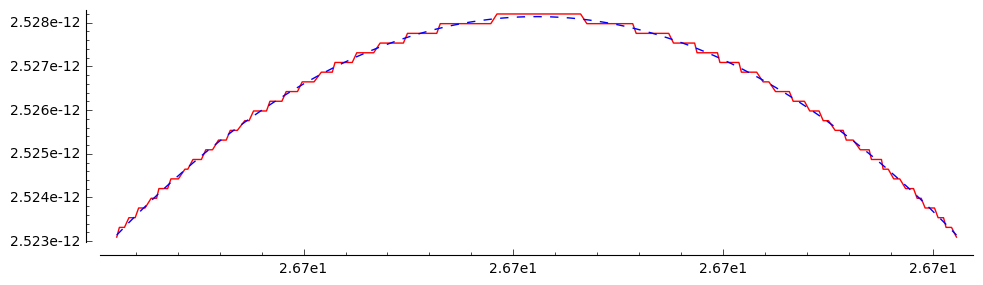

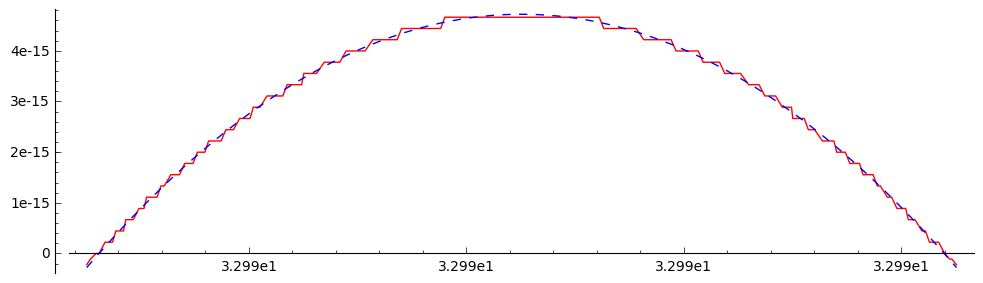

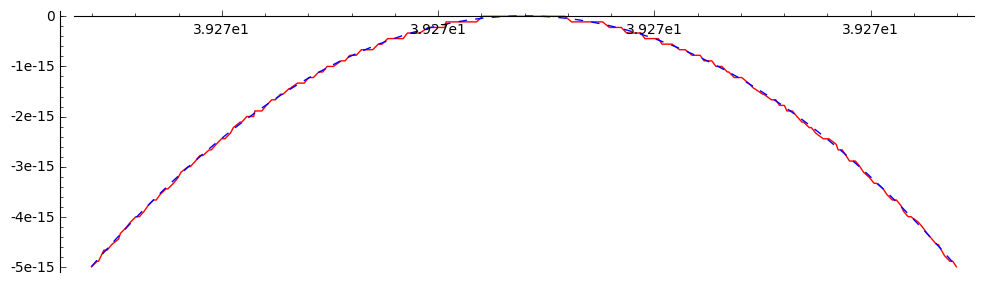

In [14]:
eps = 10^(-7)
for i in [2*(k+3)*pi + pi/2 for k in range(4)]:
    A = plot(f, (x, i-eps, i+eps), color = 'red')
    B = plot(f.taylor(x, i, 2), (x, i-eps, i+eps), linestyle = '--')
    show(A+B,figsize=[10,3])

**Example.** Expressing $f(x)=\ln x-\ln(1/x) = \ln x^2$ should avoid cancellation about $x = 1$.

**Example.** The function $f(x)=\sqrt{x^2+1}-\sqrt{x^2+4}$ will compute the difference of close numbers for all $x$ such that $|x| >> 1$. We can avoid cancellation of digits by expressing $f$ as 
$$ 
x \mapsto \frac{-3}{\sqrt{x^2 + 1} + \sqrt{x^2 + 4}}
$$

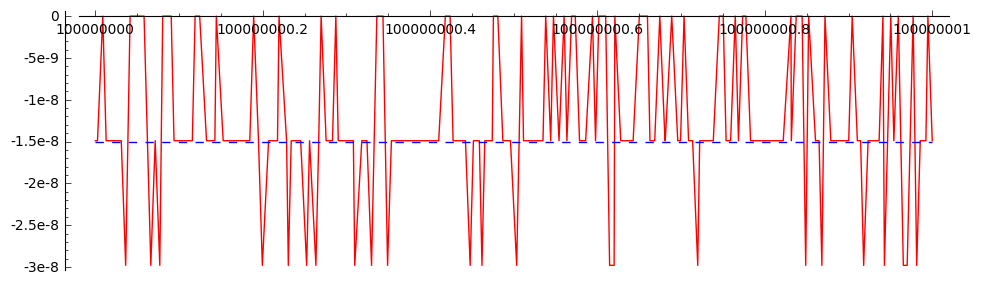

In [15]:
f = sqrt(x^2 + 1) - sqrt(x^2 + 4)
M = 10^8
A = plot(f, (x, M, M+1), color = 'red')
B = plot(lambda x: -3/(sqrt(x^2+1)+sqrt(x^2+4)), (x, M, M+1), linestyle = '--')
show(A+B,figsize=[10,3])

**Example.** Refactor $f(x)=1-2\sin^2x = \cos 2x$ to avoid cancellation about $x = \ldots \frac\pi4, \frac{3\pi}4, \frac{5\pi}4, \frac{7\pi}4 \ldots$.

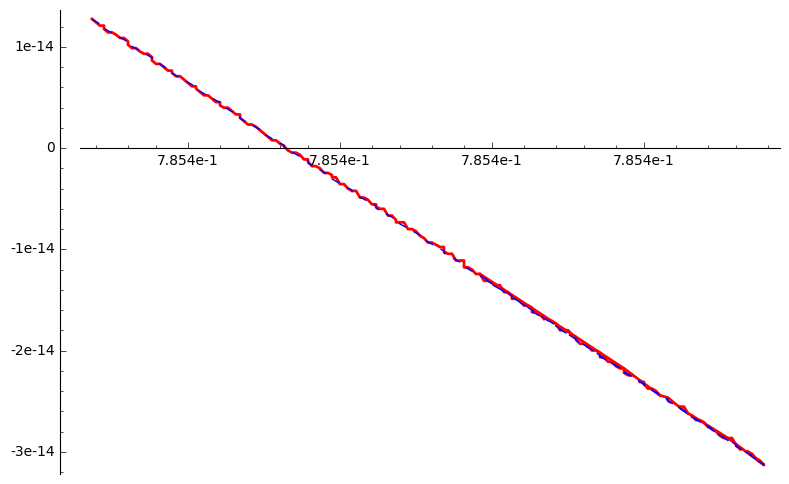

In [16]:
eps = 10^(-14.2)
A = plot(lambda x: 1-2*(sin(x))^2, (x, pi/4 - eps, pi/4 + eps), color = 'red',thickness = 2)
B = plot(lambda x: cos(2*x), (x, pi/4 - eps, pi/4 + eps), linestyle = '--')
show(A+B, figsize=[8,5])

**Example.** Consider $f(x)=\ln(x+\sqrt{x^2+1})$ about $x = 0$. Here, we approximate $f$ as a linear function.

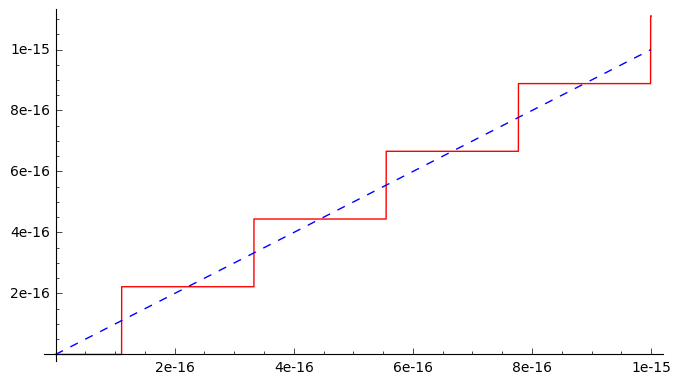

In [17]:
f = ln(x+sqrt(x^2 + 1))
eps = 10^(-15)
A = plot(f, (x,0,eps), color = 'red')
B = plot(f.taylor(x, 0, 1), (x,0,eps), linestyle = '--')
show(A+B, figsize=[7,4])

### prob 5

To show that floating point arithmetic is not associative, we'll compute the sums $\sum_{k=1}^6\frac{1}{3^k}$ (forward) and $\sum_{k=1}^6\frac{1}{3^k}$ (backward) in a finite precision number system, say, rounding at each step into $3$ radix-$10$ digits.

Actually not. Arithmetic with $3$ radix-$10$ digits is approximately arithmetic with $\frac{\ln 30}{\ln 2} \approx 5$ bits of precision, so if we use the python function `numerical_approx(x,n)` to round a (53 bit) float $x$ to $n$ bits, choosing $n = 5$ bits should do the trick. Of course, we have to define `tadd(x,y,n)` as the binary operation on $x$ and $y$ that adds and rounds to $n$ bits of precision.

In [18]:
def tadd(x,y,n):
    return numerical_approx(x+y,n)

def forward(n):
    x = 0
    for k in [1..6]:
        y = numerical_approx(1/3^k, n)
        x = tadd(x,y,n)
    return x

def backward(n):
    x = 0
    for k in [1..6]:
        y = numerical_approx(1/3^(7-k),n)
        x = tadd(x,y,n)
    return x

print(forward(5), backward(5))

(0.48, 0.50)


We see that adding forwards (large numbers first) produces a result less than that of than adding backwards (small numbers first). This is because a relatively small number may contribute no significant bits when added to a large number with finite precision arithmetic.

Extending this train of thought, we compute the two sums again at varying bits of precision.

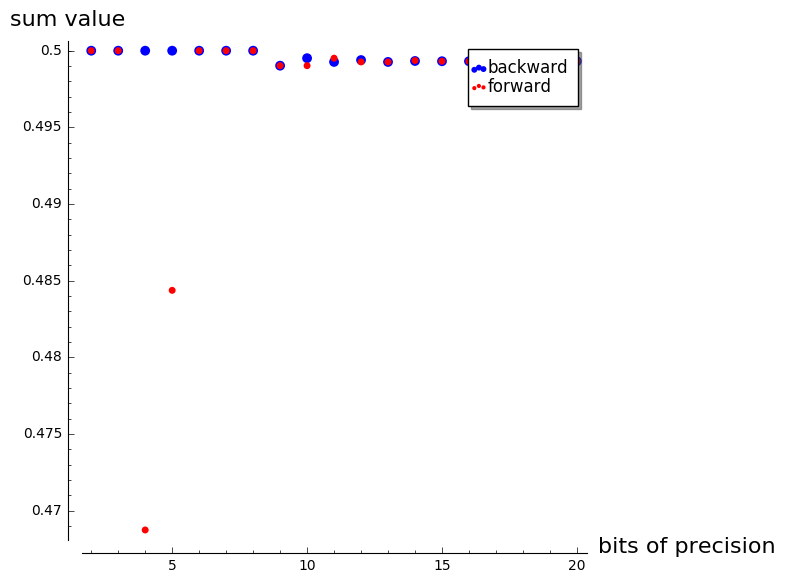

In [19]:
A = list_plot([(n,forward(n)) for n in [2..20]], size = '25', color = 'red', legend_label = 'forward') 
B = list_plot([(n,backward(n)) for n in [2..20]], size = '50', legend_label = 'backward') 
show(B + A, axes_labels=['bits of precision', 'sum value'])

## Finite Difference Approximation
### prob 6

Let $f(x)$ be a given function and recall the forward difference approximation of $f'(x)$
$$
D_+f(x)=\frac{f(x+h)-f(x)}{h},
$$
where $h>0$ is the step size.

Take $f(x)=\sin x$, $x=\pi/4$, $h=2^{-n}$ for $n=1,2,\ldots,6$. 

We plot the error versus $h$ (use a log-log plot) and print the following information


- $h$
- $D_+f$
- $f'(\pi/4)-D_+f$
- $(f'(\pi/4)-D_+f)/h$

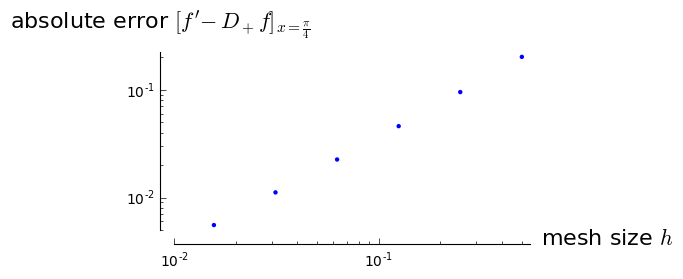

In [20]:
var('x h')
f(x) = sin(x)
Dpf(x,h) = (f(x + h) - f(x))/h
error(x,h) = f.diff(x)(x) - Dpf(x,h)

x0 = pi/4
A = list_plot([(h,error(x0,h)) for h in [2^(-n) for n in [1..6]]], scale = 'loglog')
A.show(axes_labels=['mesh size $h$','absolute error $[f\'-D_+f]_{x=\\frac{\\pi}{4}}$'],figsize=[7,3])

In [21]:
for h in [2^(-n) for n in [1..6]]:
    print '      h = ' + str(numerical_approx(h))
    print '    Dpf = ' + str(numerical_approx(Dpf(x0,h)))
    print '  error = ' + str(numerical_approx(error(x0,h)))
    print 'error/h = ' + str(numerical_approx(error(x0,h)/h))
    print

      h = 0.500000000000000
    Dpf = 0.504885697596486
  error = 0.202221083590062
error/h = 0.404442167180124

      h = 0.250000000000000
    Dpf = 0.611835119448811
  error = 0.0952716617377369
error/h = 0.381086646950948

      h = 0.125000000000000
    Dpf = 0.661130136064831
  error = 0.0459766451217174
error/h = 0.367813160973739

      h = 0.0625000000000000
    Dpf = 0.684556620327662
  error = 0.0225501608588861
error/h = 0.360802573742177

      h = 0.0312500000000000
    Dpf = 0.695944053459122
  error = 0.0111627277274238
error/h = 0.357207287277561

      h = 0.0156250000000000
    Dpf = 0.701553849951843
  error = 0.00555293123470335
error/h = 0.355387599021014



We repeat for central difference approximation,
$$
D_0f(x)=\frac{f(x+h)-f(x-h)}{2h},
$$
which also approximates $f'(x)$. 

The central difference approximation is more accurate; the order of error seems to be $O(h^2)$?

TODO: firm up discussion about "order of error". 

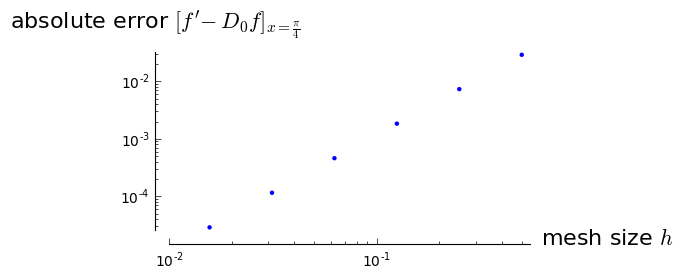

In [22]:
var('x h')
f(x) = sin(x)
D0f(x,h) = (f(x + h) - f(x - h))/(2*h)
error(x,h) = f.diff(x)(x) - D0f(x,h)

x0 = pi/4
A = list_plot([(h,error(x0,h)) for h in [2^(-n) for n in [1..6]]], scale = 'loglog')
A.show(axes_labels=['mesh size $h$','absolute error $[f\'-D_0f]_{x=\\frac{\\pi}{4}}$'],figsize=[7,3])

In [23]:
for h in [2^(-n) for n in [1..6]]:
    print '      h = ' + str(numerical_approx(h))
    print '    Dpf = ' + str(numerical_approx(D0f(x0,h)))
    print '  error = ' + str(numerical_approx(error(x0,h)))
    print 'error/h = ' + str(numerical_approx(error(x0,h)/h))
    print

      h = 0.500000000000000
    Dpf = 0.678010098842090
  error = 0.0290966823444578
error/h = 0.0581933646889157

      h = 0.250000000000000
    Dpf = 0.699764069125094
  error = 0.00734271206145365
error/h = 0.0293708482458146

      h = 0.125000000000000
    Dpf = 0.705266795354555
  error = 0.00183998583199296
error/h = 0.0147198866559437

      h = 0.0625000000000000
    Dpf = 0.706646515114127
  error = 0.000460266072420112
error/h = 0.00736425715872180

      h = 0.0312500000000000
    Dpf = 0.706991697811663
  error = 0.000115083374884528
error/h = 0.00368266799630490

      h = 0.0156250000000000
    Dpf = 0.707078009289187
  error = 0.0000287718973602802
error/h = 0.00184140143105793



### prob 7: central concavity approx

The forward and backward finite-difference operators are defined by
- $D_+f(x)=\frac{f(x+h)-f(x)}{h}$
- $D_-f(x)=\frac{f(x)-f(x-h)}{h}$

Composition (in either order) yields
$$
\begin{align}
    (D_+D_-f)(x) &= (D_+(D_-f))(x)\\
        &= \frac{(D_-f)(x+h) - (D_-f)(x)}h\\
        &= \frac{\frac{f(x+h)-f(x)}h - \frac{f(x)-f(x-h)}h}h\\
        &= \frac{f(x+h)-2f(x)+f(x-h)}{h^2}.
\end{align}
$$

Expanding $f(x+h)$ and $f(x-h)$ into $3$rd order Taylor polynomials ($4$th order remainders) we have 

- $f(x+h) = f(x) + hf^{(1)}(x) + \frac{h^2}{2!} f^{(2)}(x) + \frac{h^3}{3!} f^{(3)}(x) + \frac{h^4}{4!}f^{(4)}(\xi_1)$ with $\xi_1 \in (x, x+h)$.
- $f(x-h) = f(x) - hf^{(1)}(x) + \frac{h^2}{2!} f^{(2)}(x) - \frac{h^3}{3!} f^{(3)}(x) + \frac{h^4}{4!}f^{(4)}(\xi_2)$ with $\xi_2 \in (x-h, x)$.
    
Adding the polynomials above, substracting $2f(x)$, and dividing out $h^2$ we have

$$
\frac{f(x+h)-2f(x)+f(x-h)}{h^2} = f^{(2)}(x) + \frac{h^2}{4!}(f^{(4)}(\xi_1) + f^{(4)}(\xi_2)).
$$

Whence

$$
\begin{align}
\left|D_+D_-f(x) - f^{(2)}(x)\right| 
    &= \left|\frac{h^2}{4!}(f^{(4)}(\xi_1) + f^{(4)}(\xi_2))\right|\\
    &\leq \frac{h^2}{12}\left|f^{(4)}(\xi)\right| \quad\text{for some $\xi \in (x-h, x+h)$}\\
    &\leq \frac{h^2}{12}\cdot M \quad\text{for $M=\max \left|f^{(4)}(\xi)\right|$}.
\end{align}
$$

In summary, we've shown that $D_+D_-f(x)=f''(x)+O(h^2)$ with asymptotic error constant $\frac{M}{12}$.

## Rootfinding
### prob 8

Consider $f(x) = x^2 - 5$. Since $f(2) < 0$, $f(3) > 0$, 
it follows that $f(x)$ has a root $p$ in the
interval $(2, 3)$. Compute an approximation to $p$ 
by the following methods. Take $10$ steps in
each case. Print the answers to $15$ digits.

Print the following information for each method. Do the results agree
with the theory discussed in class?
- $n$ (step)
- $x_n$ (approximation)
- $f(x_n)$  (residual)
- $|p - x_n|$  (error)

bisection method, starting interval $[a, b] = [2, 3]$

In [24]:
from numpy import sign

def bisect(f, root, a, b, eps, Nmax, PRINT = True):
    i=0
    while b - a > eps and i < Nmax:
        p = a + (b-a)/2
        if sign(f(x=p)) == sign(f(x=b)):
            b = p
        else:
            a = p
        i += 1
        if PRINT:
            print "    step "+str(i)
            print "  approx "+str(numerical_approx(p))
            print "residual "+str(numerical_approx(f(x=p)))
            print "   error "+str(numerical_approx(root-p))
            print
    return numerical_approx(p)

f = x^2 - 5
root=sqrt(5); a=2; b=3; eps=10^(-15); Nmax=10
bisect(f, root, a, b, eps, Nmax)

    step 1
  approx 2.50000000000000
residual 1.25000000000000
   error -0.263932022500210

    step 2
  approx 2.25000000000000
residual 0.0625000000000000
   error -0.0139320225002102

    step 3
  approx 2.12500000000000
residual -0.484375000000000
   error 0.111067977499790

    step 4
  approx 2.18750000000000
residual -0.214843750000000
   error 0.0485679774997898

    step 5
  approx 2.21875000000000
residual -0.0771484375000000
   error 0.0173179774997898

    step 6
  approx 2.23437500000000
residual -0.00756835937500000
   error 0.00169297749978981

    step 7
  approx 2.24218750000000
residual 0.0274047851562500
   error -0.00611952250021019

    step 8
  approx 2.23828125000000
residual 0.00990295410156250
   error -0.00221327250021019

    step 9
  approx 2.23632812500000
residual 0.00116348266601562
   error -0.000260147500210195

    step 10
  approx 2.23535156250000
residual -0.00320339202880859
   error 0.000716414999789805



2.23535156250000

fixed-point iteration with $g_1(x) = 5/x$ and $g_2(x) = x - f(x)/3$, starting value $2.5$

In [25]:
def fixedpt(f, g, root, p1, eps, Nmax, PRINT = True):
    i=0; p0=float("inf")
    while abs(p1 - p0) > eps and i < Nmax:
        p0 = p1
        p1 = g(x=p1)
        i += 1
        if PRINT:
            print "    step "+str(i)
            print "  approx "+str(p1)
            print "residual "+str(f(x=p1))
            print "   error "+str(numerical_approx(root-p1))
            print
    return numerical_approx(p1)

f = x^2 - 5
g1 = 5/x
root=sqrt(5); p1=2.5; eps=10^(-15); Nmax=10
fixedpt(f, g1, root, p1, eps, Nmax)

    step 1
  approx 2.00000000000000
residual -1.00000000000000
   error 0.236067977499790

    step 2
  approx 2.50000000000000
residual 1.25000000000000
   error -0.263932022500210

    step 3
  approx 2.00000000000000
residual -1.00000000000000
   error 0.236067977499790

    step 4
  approx 2.50000000000000
residual 1.25000000000000
   error -0.263932022500210

    step 5
  approx 2.00000000000000
residual -1.00000000000000
   error 0.236067977499790

    step 6
  approx 2.50000000000000
residual 1.25000000000000
   error -0.263932022500210

    step 7
  approx 2.00000000000000
residual -1.00000000000000
   error 0.236067977499790

    step 8
  approx 2.50000000000000
residual 1.25000000000000
   error -0.263932022500210

    step 9
  approx 2.00000000000000
residual -1.00000000000000
   error 0.236067977499790

    step 10
  approx 2.50000000000000
residual 1.25000000000000
   error -0.263932022500210



2.50000000000000

In [26]:
g2 = x - f(x)/3
root=sqrt(5); p1=2.5; eps=10^(-15); Nmax=10
fixedpt(f, g2, root, p1, eps, Nmax)

    step 1
  approx 2.08333333333333
residual -0.659722222222220
   error 0.152734644166456

    step 2
  approx 2.30324074074074
residual 0.304917909807957
   error -0.0671727632409511

    step 3
  approx 2.20160143747142
residual -0.152951110523769
   error 0.0344665400283679

    step 4
  approx 2.25258514097935
residual 0.0741398173609369
   error -0.0165171634795556

    step 5
  approx 2.22787186852570
residual -0.0365869374318049
   error 0.00819610897408962

    step 6
  approx 2.24006751433630
residual 0.0179024687848175
   error -0.00399953683651200

    step 7
  approx 2.23410002474136
residual -0.00879707945064379
   error 0.00196795275842732

    step 8
  approx 2.23703238455824
residual 0.00431388956234358
   error -0.000964407058454242

    step 9
  approx 2.23559442137080
residual -0.00211758313577270
   error 0.000473556128993025

    step 10
  approx 2.23630028241605
residual 0.00103895313412750
   error -0.000232304916265136



/Applications/SageMath/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


2.23630028241605

Newton's method, starting value $x_0 = 2.5$.

In [27]:
g = x - f(x)/(diff(f,x)(x))
root = sqrt(5)
root=sqrt(5); p1=2.5; eps=10^(-15); Nmax=10
fixedpt(f, g, root, p1, eps, Nmax)

    step 1
  approx 2.25000000000000
residual 0.0625000000000000
   error -0.0139320225002102

    step 2
  approx 2.23611111111111
residual 0.000192901234568055
   error -0.0000431336113213554

    step 3
  approx 2.23606797791580
residual 1.86047355299479e-9
   error -4.16014334092552e-10

    step 4
  approx 2.23606797749979
residual 8.88178419700125e-16
   error 0.000000000000000

    step 5
  approx 2.23606797749979
residual 8.88178419700125e-16
   error 0.000000000000000



2.23606797749979

### prob 9 

Consider the function $g(x)=2x(1-x)$.

We verify $x=0$ and $x=1/2$ are fixed points of $g(x)$.

In [28]:
g = 2*x*(1-x)
print(g(x=0), g(x=0.5))

(0, 0.500000000000000)


We expect that fixed point iteration, starting even with a value very close to zero, will fail to converge toward $x=0$ because (the following are equivalent)
- $\frac d{dx}\left[g(x) - x\right]_{x=0} > 0$
- for all $x_{n} \neq 0$ in sufficiently small open sets $U$ containing $0$, the fixed point iterations "push away", i.e., $|x_{n+1}|=|g(x_{n})| > |x_{n}|$
- $0$ is an unstable equilibrium for some first order separable differential equation in $x$ whose phase space is represented by $g(x) - x$ (e.g., the logistic equation)

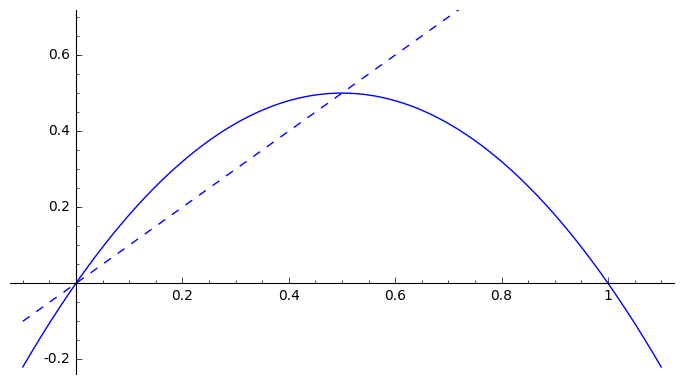

In [29]:
A = plot(g, (x, -0.1, 1.1))
B = plot(x, (x, -0.1, 1.1), linestyle = '--')
show(A + B, ymax = 0.7, figsize = [7,4])

We should expect that fixed point iteration starting with $p_0\in(0,1)$ will converge toward $x=1/2$ because the image of $(0,1)$ under the mapping $g$ is $\left(0, \frac12\right)$. In this case, it can be shown any sequence of iterations with terms in $\left(0, \frac12\right)$ will converge to $\frac12$. We should expect a linear order of convergence (see the log-log plot below---pretty linear).

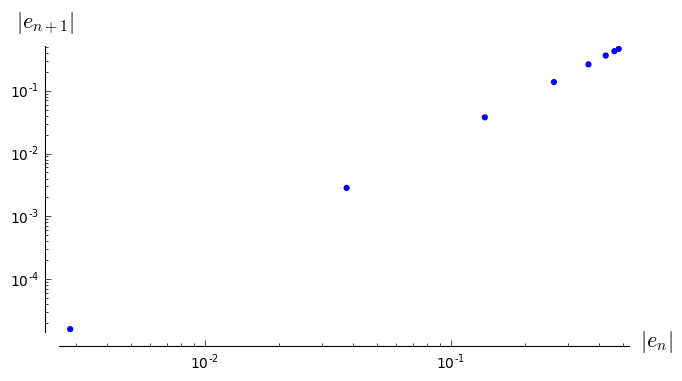

In [30]:
def naivefixedpt(g,p1,eps,Nmax,PRINT=True):
    i=0; p0=float("inf"); seq=[]
    while abs(p1 - p0) > eps and i < Nmax:
        p0 = p1
        p1 = g(x=p1)
        i += 1
        seq.append(numerical_approx(p1))
    return seq

g = 2*x*(1-x)
s = naivefixedpt(g, 0.99, 10^(-20),10)
A = list_plot([(abs(s[n]-0.5),abs(s[n+1]-0.5)) for n in range(8)], size = '20')
A.show(scale='loglog', axes_labels=['$|e_n|$','$|e_{n+1}|$'], figsize = [7,4])

To numerically confirm the order of convergence, we'll use linear regression to find the relation between $|e_{n+1}|$ and $|e_n|$.

In [31]:
R = [(log(abs(s[n]-0.5)),log(abs(s[n+1]-0.5))) for n in range(8)]

var('a b')
model(x) = a*x+b
find_fit(R,model)

[a == 1.9999999999997233, b == 0.693147180559597]

TODO: determine the asymptotic error constant from the linear regression (is this possible?).